In [1]:
import import_ipynb
from Seline import MLR, mclp, plot_input, plot_result
import pandas as pd

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

importing Jupyter notebook from Seline.ipynb


# Load Dataset

In [2]:
raw_demand = pd.read_csv('dataset/수요지_데이터셋.csv', index_col=0)
raw_candidate = pd.read_csv('dataset/후보지_정렬2000.csv', index_col=0)

In [3]:
raw_demand

,cell_x,cell_y,car,population,houses,houses_parking,charger_count,charger_value,building_religion,building_sale,building_edu,building_work,building_factory,public_parking_lot,public_parking_space,tot_count_
0,127.030786,37.362273,20322.0,13,0,0,0,1.0,1,0,0,0,0,0,0,90.944
1,127.030798,37.360471,20322.0,0,0,0,0,1.0,1,0,0,0,0,0,0,22.332
2,127.031927,37.360475,20322.0,21,0,0,0,1.0,1,0,0,0,0,0,0,14.954
3,127.031932,37.359574,20322.0,18,0,0,0,1.0,1,0,0,0,0,0,0,10.450
4,127.034124,37.370399,20322.0,0,0,0,0,1.0,0,0,0,0,0,0,0,2080.344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,127.421737,37.147743,3607.0,0,0,0,0,1.0,0,0,5,0,0,0,0,97.318
10825,127.421738,37.146841,3607.0,0,0,0,0,1.0,0,0,5,0,0,0,0,58.772
10826,127.421742,37.143236,3607.0,0,0,0,0,1.0,0,0,0,0,0,0,0,106.540
10827,127.421743,37.142334,3607.0,0,0,0,0,1.0,0,0,0,0,0,0,0,49.656


In [4]:
raw_lin = raw_demand.drop(["charger_count","charger_value"],axis= 1)

,cell_x,cell_y,car,population,houses,houses_parking,building_religion,building_sale,building_edu,building_work,building_factory,public_parking_lot,public_parking_space,tot_count_
count,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.00000,10829.000000
mean,127.165474,37.262857,11842.889379,91.210730,72.585927,93.465971,0.990858,0.294210,3.147936,0.865362,3.345277,0.503648,52.90507,894.505477
std,0.077720,0.058154,3868.637828,176.674292,244.714359,331.130764,1.413171,0.776374,4.536119,2.183021,6.320860,1.286496,178.26068,6439.686231
min,127.030786,37.086901,3607.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.011000
25%,127.103806,37.233667,9713.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,13.455000
50%,127.147760,37.270556,12192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,59.160000
75%,127.216422,37.308362,14200.000000,95.000000,0.000000,0.000000,2.000000,0.000000,5.000000,1.000000,4.000000,0.000000,0.00000,363.179000
max,127.424004,37.370399,21707.000000,1876.000000,3511.000000,5082.000000,12.000000,8.000000,34.000000,23.000000,53.000000,10.000000,1532.00000,368129.236000


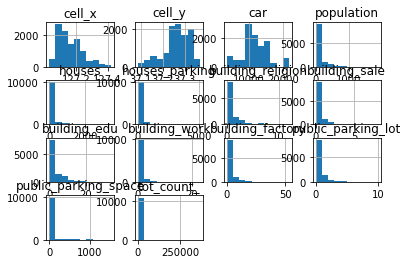

In [5]:
raw_lin.hist()
raw_lin.describe()

In [6]:
raw_candidate

,cell_x,cell_y,cnt_cust*charger_val
0,127.075577,37.229037,345469.765400
1,127.072773,37.326377,281137.608500
2,127.078416,37.326397,157946.033400
3,127.083006,37.312893,138673.965000
4,127.089601,37.345366,114740.448000
...,...,...,...
1995,127.124828,37.299512,591.654180
1996,127.127000,37.316645,590.826000
1997,127.132574,37.098522,590.358000
1998,127.131695,37.279703,590.295343


# 전처리 & 입지선정지수

In [7]:
scaler = StandardScaler()
raw_lin.iloc[:,2:] = scaler.fit_transform(raw_lin.iloc[:,2:])
# idx_x = idx_scaled[:,:-1]
# idx_y = idx_scaled[:,-1]

In [8]:
raw_lin

,cell_x,cell_y,car,population,houses,houses_parking,building_religion,building_sale,building_edu,building_work,building_factory,public_parking_lot,public_parking_space,tot_count_
0,127.030786,37.362273,2.191857,-0.442704,-0.296629,-0.282276,0.006470,-0.378971,-0.694003,-0.396424,-0.529268,-0.391506,-0.296799,-0.124788
1,127.030798,37.360471,2.191857,-0.516289,-0.296629,-0.282276,0.006470,-0.378971,-0.694003,-0.396424,-0.529268,-0.391506,-0.296799,-0.135444
2,127.031927,37.360475,2.191857,-0.397420,-0.296629,-0.282276,0.006470,-0.378971,-0.694003,-0.396424,-0.529268,-0.391506,-0.296799,-0.136589
3,127.031932,37.359574,2.191857,-0.414402,-0.296629,-0.282276,0.006470,-0.378971,-0.694003,-0.396424,-0.529268,-0.391506,-0.296799,-0.137289
4,127.034124,37.370399,2.191857,-0.516289,-0.296629,-0.282276,-0.701191,-0.378971,-0.694003,-0.396424,-0.529268,-0.391506,-0.296799,0.184154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,127.421737,37.147743,-2.128984,-0.516289,-0.296629,-0.282276,-0.701191,-0.378971,0.408311,-0.396424,-0.529268,-0.391506,-0.296799,-0.123799
10825,127.421738,37.146841,-2.128984,-0.516289,-0.296629,-0.282276,-0.701191,-0.378971,0.408311,-0.396424,-0.529268,-0.391506,-0.296799,-0.129785
10826,127.421742,37.143236,-2.128984,-0.516289,-0.296629,-0.282276,-0.701191,-0.378971,-0.694003,-0.396424,-0.529268,-0.391506,-0.296799,-0.122366
10827,127.421743,37.142334,-2.128984,-0.516289,-0.296629,-0.282276,-0.701191,-0.378971,-0.694003,-0.396424,-0.529268,-0.391506,-0.296799,-0.131200


In [9]:
idx_x = raw_lin.iloc[:,2:].drop("tot_count_",axis = 1)

In [10]:
idx_y = raw_lin.iloc[:,-1]

In [11]:
idx_model = MLR(idx_x, idx_y)
idx_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tot_count_   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     40.21
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           4.32e-86
Time:                        15:03:44   Log-Likelihood:                -15149.
No. Observations:               10829   AIC:                         3.032e+04
Df Residuals:                   10817   BIC:                         3.041e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.939e-18      0.009   7.36e-16      1.000      -0.018       0.018
car                      0.0087      0.010      0.905      0.365      -0.010       0.028
population               0.1875      0.011     17.115      0.000       0.166       0.209
houses                  -0.0725      0.031     -2.311      0.021      -0.134      -0.011
houses_parking           0.0956      0.031      3.098      0.002       0.035       0.156
building_religion       -0.0068      0.010     -0.661      0.508      -0.027       0.013
building_sale            0.0041      0.010      0.403      0.687      -0.016       0.024
building_edu             0.0060      0.010      0.577      0.564      -0.014       0.026
building_work           -0.0134      0.013     -1.012      0.312      -0.039       0.013
building_factory         0.0288      0.010      2.939      0.003       0.010       0.048
public_parking_lot      -0.0120      0.020     -0.615      0.538      -0.050       0.026
public_parking_space     0.0306      0.017      1.855      0.064      -0.002       0.063
==============================================================================
Omnibus:                    29522.310   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1194758992.416
Skew:                          33.825   Prob(JB):                         0.00
Kurtosis:                    1628.833   Cond. No.                         8.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
demand_coeff = idx_model.coef()

In [13]:
raw_lin['ind'] = (demand_coeff[0]*raw_lin['car']+
                     demand_coeff[1]*raw_lin['population']+
                     demand_coeff[2]*raw_lin['houses']+
                     demand_coeff[3]*raw_lin['houses_parking']+
                     demand_coeff[4]*raw_lin['building_religion']+
                     demand_coeff[5]*raw_lin['building_sale']+
                     demand_coeff[6]*raw_lin['building_edu'] +
                     demand_coeff[7]*raw_lin['building_work'] +
                     demand_coeff[8]*raw_lin['building_factory'] +
                     demand_coeff[9]*raw_demand['public_parking_lot'] +
                     demand_coeff[10]*raw_lin['public_parking_space'])

In [14]:
raw_lin

,cell_x,cell_y,car,population,houses,houses_parking,building_religion,building_sale,building_edu,building_work,building_factory,public_parking_lot,public_parking_space,tot_count_,ind
0,127.030786,37.362273,2.191857,-0.442704,-0.296629,-0.282276,0.006470,-0.378971,-0.694003,-0.396424,-0.529268,-0.391506,-0.296799,-0.124788,-0.030386
1,127.030798,37.360471,2.191857,-0.516289,-0.296629,-0.282276,0.006470,-0.378971,-0.694003,-0.396424,-0.529268,-0.391506,-0.296799,-0.135444,-0.031029
2,127.031927,37.360475,2.191857,-0.397420,-0.296629,-0.282276,0.006470,-0.378971,-0.694003,-0.396424,-0.529268,-0.391506,-0.296799,-0.136589,-0.029991
3,127.031932,37.359574,2.191857,-0.414402,-0.296629,-0.282276,0.006470,-0.378971,-0.694003,-0.396424,-0.529268,-0.391506,-0.296799,-0.137289,-0.030139
4,127.034124,37.370399,2.191857,-0.516289,-0.296629,-0.282276,-0.701191,-0.378971,-0.694003,-0.396424,-0.529268,-0.391506,-0.296799,0.184154,-0.098687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,127.421737,37.147743,-2.128984,-0.516289,-0.296629,-0.282276,-0.701191,-0.378971,0.408311,-0.396424,-0.529268,-0.391506,-0.296799,-0.123799,-0.094164
10825,127.421738,37.146841,-2.128984,-0.516289,-0.296629,-0.282276,-0.701191,-0.378971,0.408311,-0.396424,-0.529268,-0.391506,-0.296799,-0.129785,-0.094164
10826,127.421742,37.143236,-2.128984,-0.516289,-0.296629,-0.282276,-0.701191,-0.378971,-0.694003,-0.396424,-0.529268,-0.391506,-0.296799,-0.122366,-0.098687
10827,127.421743,37.142334,-2.128984,-0.516289,-0.296629,-0.282276,-0.701191,-0.378971,-0.694003,-0.396424,-0.529268,-0.391506,-0.296799,-0.131200,-0.098687


## 후보지

In [15]:
raw_candidate

,cell_x,cell_y,cnt_cust*charger_val
0,127.075577,37.229037,345469.765400
1,127.072773,37.326377,281137.608500
2,127.078416,37.326397,157946.033400
3,127.083006,37.312893,138673.965000
4,127.089601,37.345366,114740.448000
...,...,...,...
1995,127.124828,37.299512,591.654180
1996,127.127000,37.316645,590.826000
1997,127.132574,37.098522,590.358000
1998,127.131695,37.279703,590.295343


In [16]:
## 후보지 데이터 좌표값 가져오기

X = list(raw_candidate["cell_x"])
Y = list(raw_candidate["cell_y"])

candidate_points = np.array([list(i) for i in zip(X, Y)])
print(candidate_points.shape)
candidate_points

(2000, 2)


array([[127.0755771 ,  37.22903674],
       [127.0727728 ,  37.3263772 ],
       [127.0784163 ,  37.32639744],
       ...,
       [127.1325735 ,  37.09852241],
       [127.1316946 ,  37.27970291],
       [127.1314615 ,  37.32747594]])

In [17]:
## 수요지 데이터 좌표값 가져오기

X = list(raw_lin["cell_x"])
Y = list(raw_lin["cell_y"])

demand_points = np.array([list(i) for i in zip(X, Y)])
print(demand_points.shape)
demand_points

(10829, 2)


array([[127.0307864 ,  37.36227345],
       [127.0307977 ,  37.36047073],
       [127.0319269 ,  37.36047521],
       ...,
       [127.4217421 ,  37.1432356 ],
       [127.421743  ,  37.14233418],
       [127.424004  ,  37.13332144]])

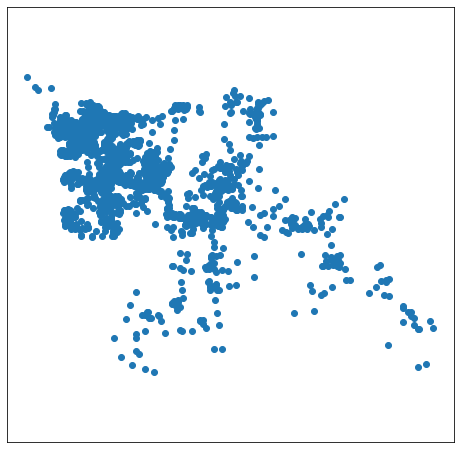

In [18]:
# Plot input data
plot_input(candidate_points)

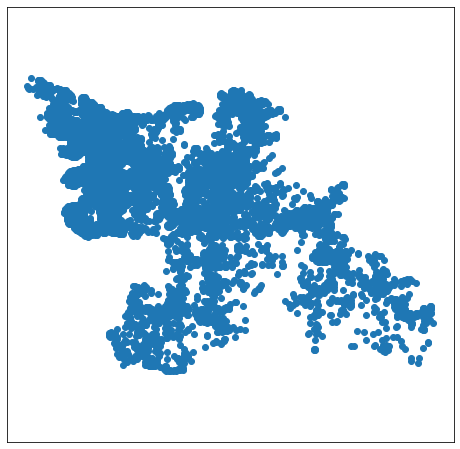

In [19]:
plot_input(demand_points)

In [20]:
# mclp(K, radius, demand, candidate, Weight):
mclp(20,500,demand_points , candidate_points, demand_coeff)

----- Configurations -----
  수요지 수 10829
  후보지 수 2000
  K 20
  Radius 500


InterfacingError: Gurobi environment could not be loaded, check your license.

In [ ]:
# conda config --add channels http://conda.anaconda.org/gurobi


In [ ]:
# conda install gurobi